<a href="https://colab.research.google.com/github/susmithanunna/Potato-leaf-disease-detection-website/blob/main/Copy_of_Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=50

In [ ]:
data=tf.keras.preprocessing.image_dataset_from_directory(("/content/drive/MyDrive/data set"),
seed=123,
shuffle=True,
image_size=(IMAGE_SIZE,IMAGE_SIZE),
batch_size=BATCH_SIZE
)

Found 3373 files belonging to 5 classes.


In [ ]:
class_names=data.class_names
class_names

['Insect',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Virus']

In [ ]:
len(data)

106

In [ ]:
for image_batch,label_batch in data.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[2 2 4 0 1 4 2 4 2 4 2 1 0 1 1 1 3 2 4 1 2 3 1 1 1 4 2 4 0 4 2 1]


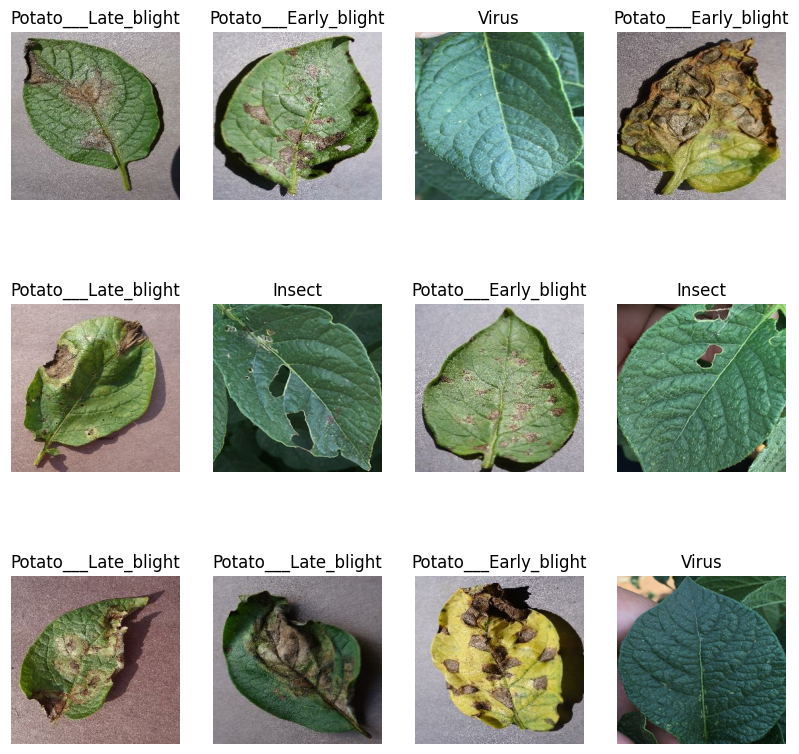

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in data.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [ ]:
len(data)

106

In [ ]:
def get_data_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  assert (train_split + test_split + val_split) == 1
  ds_size=len(ds)
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)
  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)
  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)
  return train_ds,val_ds,test_ds

In [ ]:
tarin_ds,val_ds,test_ds=get_data_partitions_tf(data)

In [ ]:
len(train_ds)

84

In [ ]:
len(val_ds)

10

In [ ]:
len(test_ds)

12

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_agumentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=5
model=models.Sequential([
                        resize_and_rescale,
                        layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Conv2D(64,(3,3),activation='relu'),
                        layers.MaxPooling2D((2,2)),
                        layers.Flatten(),
                        layers.Dense(64,activation='relu'),
                        layers.Dense(n_classes,activation='softmax'),
                        ])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
84/84 [==============================] - 106s 1s/step - loss: 1.0379 - accuracy: 0.5528 - val_loss: 0.8241 - val_accuracy: 0.6250
Epoch 2/50
84/84 [==============================] - 5s 58ms/step - loss: 0.7153 - accuracy: 0.6801 - val_loss: 0.6217 - val_accuracy: 0.7344
Epoch 3/50
84/84 [==============================] - 5s 57ms/step - loss: 0.5661 - accuracy: 0.7891 - val_loss: 0.4370 - val_accuracy: 0.8281
Epoch 4/50
84/84 [==============================] - 5s 58ms/step - loss: 0.3261 - accuracy: 0.8769 - val_loss: 0.2625 - val_accuracy: 0.9000
Epoch 5/50
84/84 [==============================] - 5s 57ms/step - loss: 0.2556 - accuracy: 0.9066 - val_loss: 0.2149 - val_accuracy: 0.9312
Epoch 6/50
84/84 [==============================] - 5s 57ms/step - loss: 0.2195 - accuracy: 0.9196 - val_loss: 0.1897 - val_accuracy: 0.9219
Epoch 7/50
84/84 [==============================] - 5s 59ms/step - loss: 0.1750 - accuracy: 0.9368 - val_loss: 0.1855 - val_accuracy: 0.9406
Epoch 8/50
84

In [ ]:
scores=model.evaluate(test_ds)

12/12 [==============================] - 10s 28ms/step - loss: 0.2695 - accuracy: 0.9766


In [ ]:
scores

[0.269481897354126, 0.9765625]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
history.history['accuracy']

[0.44733795523643494,
 0.6695601940155029,
 0.75,
 0.8657407164573669,
 0.9016203880310059,
 0.9160879850387573,
 0.9490740895271301,
 0.9537037014961243,
 0.9646990895271301,
 0.9739583134651184,
 0.9681712985038757,
 0.9496527910232544,
 0.9756944179534912,
 0.9768518805503845,
 0.9849537014961243,
 0.9884259104728699,
 0.9936342835426331,
 0.9641203880310059,
 0.9554398059844971,
 0.9699074029922485,
 0.9907407164573669,
 0.9959490895271301,
 0.9976851940155029,
 0.9947916865348816,
 0.9866898059844971,
 0.9826388955116272,
 0.9832175970077515,
 0.9918981194496155,
 0.9901620149612427,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

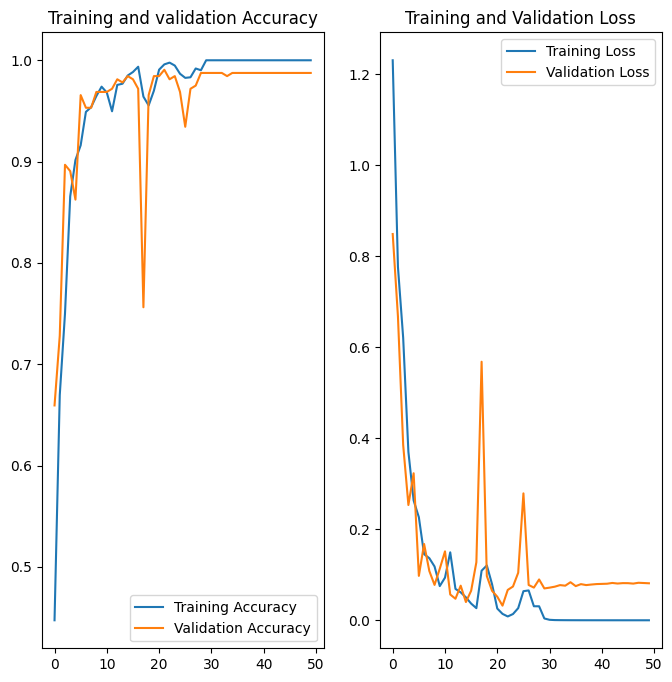

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

frist image to predict
frist image's actual label: Potato___Late_blight
1/1 [==============================] - 0s 197ms/step
Perdicted label: Potato___Late_blight


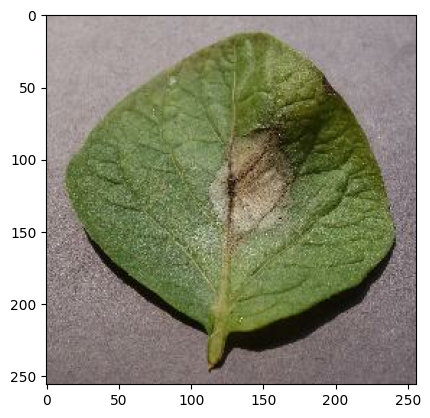

In [ ]:
for images_batch,labels_batch in test_ds.take(1):
 first_image=images_batch[0].numpy().astype('uint8')
 first_label=labels_batch[0].numpy()
 print("frist image to predict")
 plt.imshow(first_image)
 print("frist image's actual label:",class_names[first_label])
 batch_prediction=model.predict(images_batch)
 print("Perdicted label:",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 27ms/step


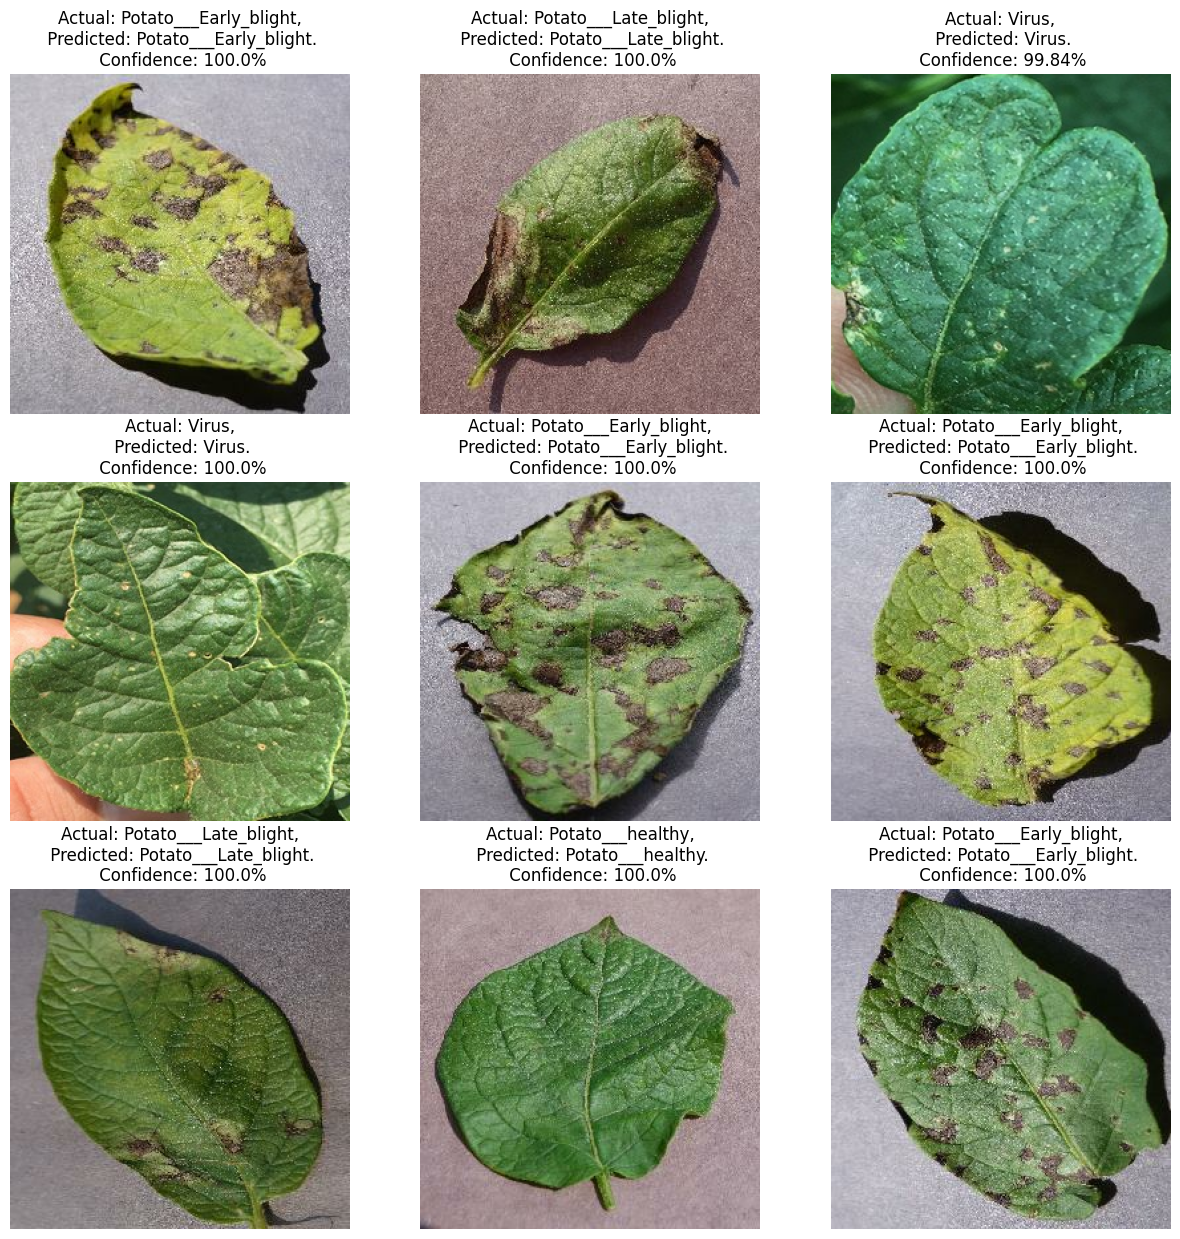

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
model.save("/content/drive/MyDrive/model1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save("/content/drive/MyDrive/my_model11")

In [ ]:
model.save("/content/drive/MyDrive/my_model1/model1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
y_true = []  # True labels
y_pred = []  # Predicted labels

In [ ]:
for x, labels in val_ds:
    y_true.extend(labels.numpy())
    predictions = model.predict(x)
    y_pred.extend(predictions.argmax(axis=1))


1/1 [==============================] - 0s 44ms/step


In [ ]:
f1 = f1_score(y_true, y_pred, average='weighted')

In [ ]:
print("Weighted F1 Score:", f1)

Weighted F1 Score: 0.9874475993146399


In [ ]:
def get_data_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  assert (train_split + test_split + val_split) == 1
  ds_size=len(ds)
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)
  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)
  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)
  return train_ds,val_ds,test_ds